In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
%matplotlib inline

In [2]:
# import dataset
td = pd.read_csv('banking.csv')

In [3]:
td.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0.0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3.0,6.0,2.0,success,-1.7,94.055,-39.8,0.729,4991.6,1.0
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0.0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1.0,3.0,1.0,success,-2.9,92.201,-31.4,0.869,5076.2,1.0


In [4]:
td.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0.0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3.0,6.0,2.0,success,-1.7,94.055,-39.8,0.729,4991.6,1.0
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0.0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1.0,3.0,1.0,success,-2.9,92.201,-31.4,0.869,5076.2,1.0
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,...,8.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0.0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,...,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0.0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,...,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0.0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,...,1.0,3.0,1.0,success,-2.9,92.963,-40.8,1.266,5076.2,1.0
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,...,2.0,999.0,1.0,failure,-1.8,93.075,-47.1,1.410,5099.1,0.0


## DATA VISUALIZATION

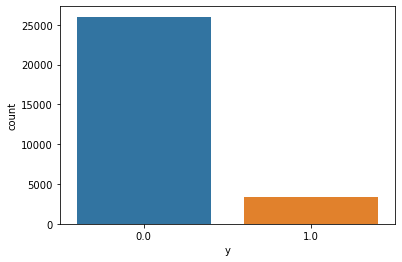

In [5]:
sns.countplot(x = 'y', data = td)

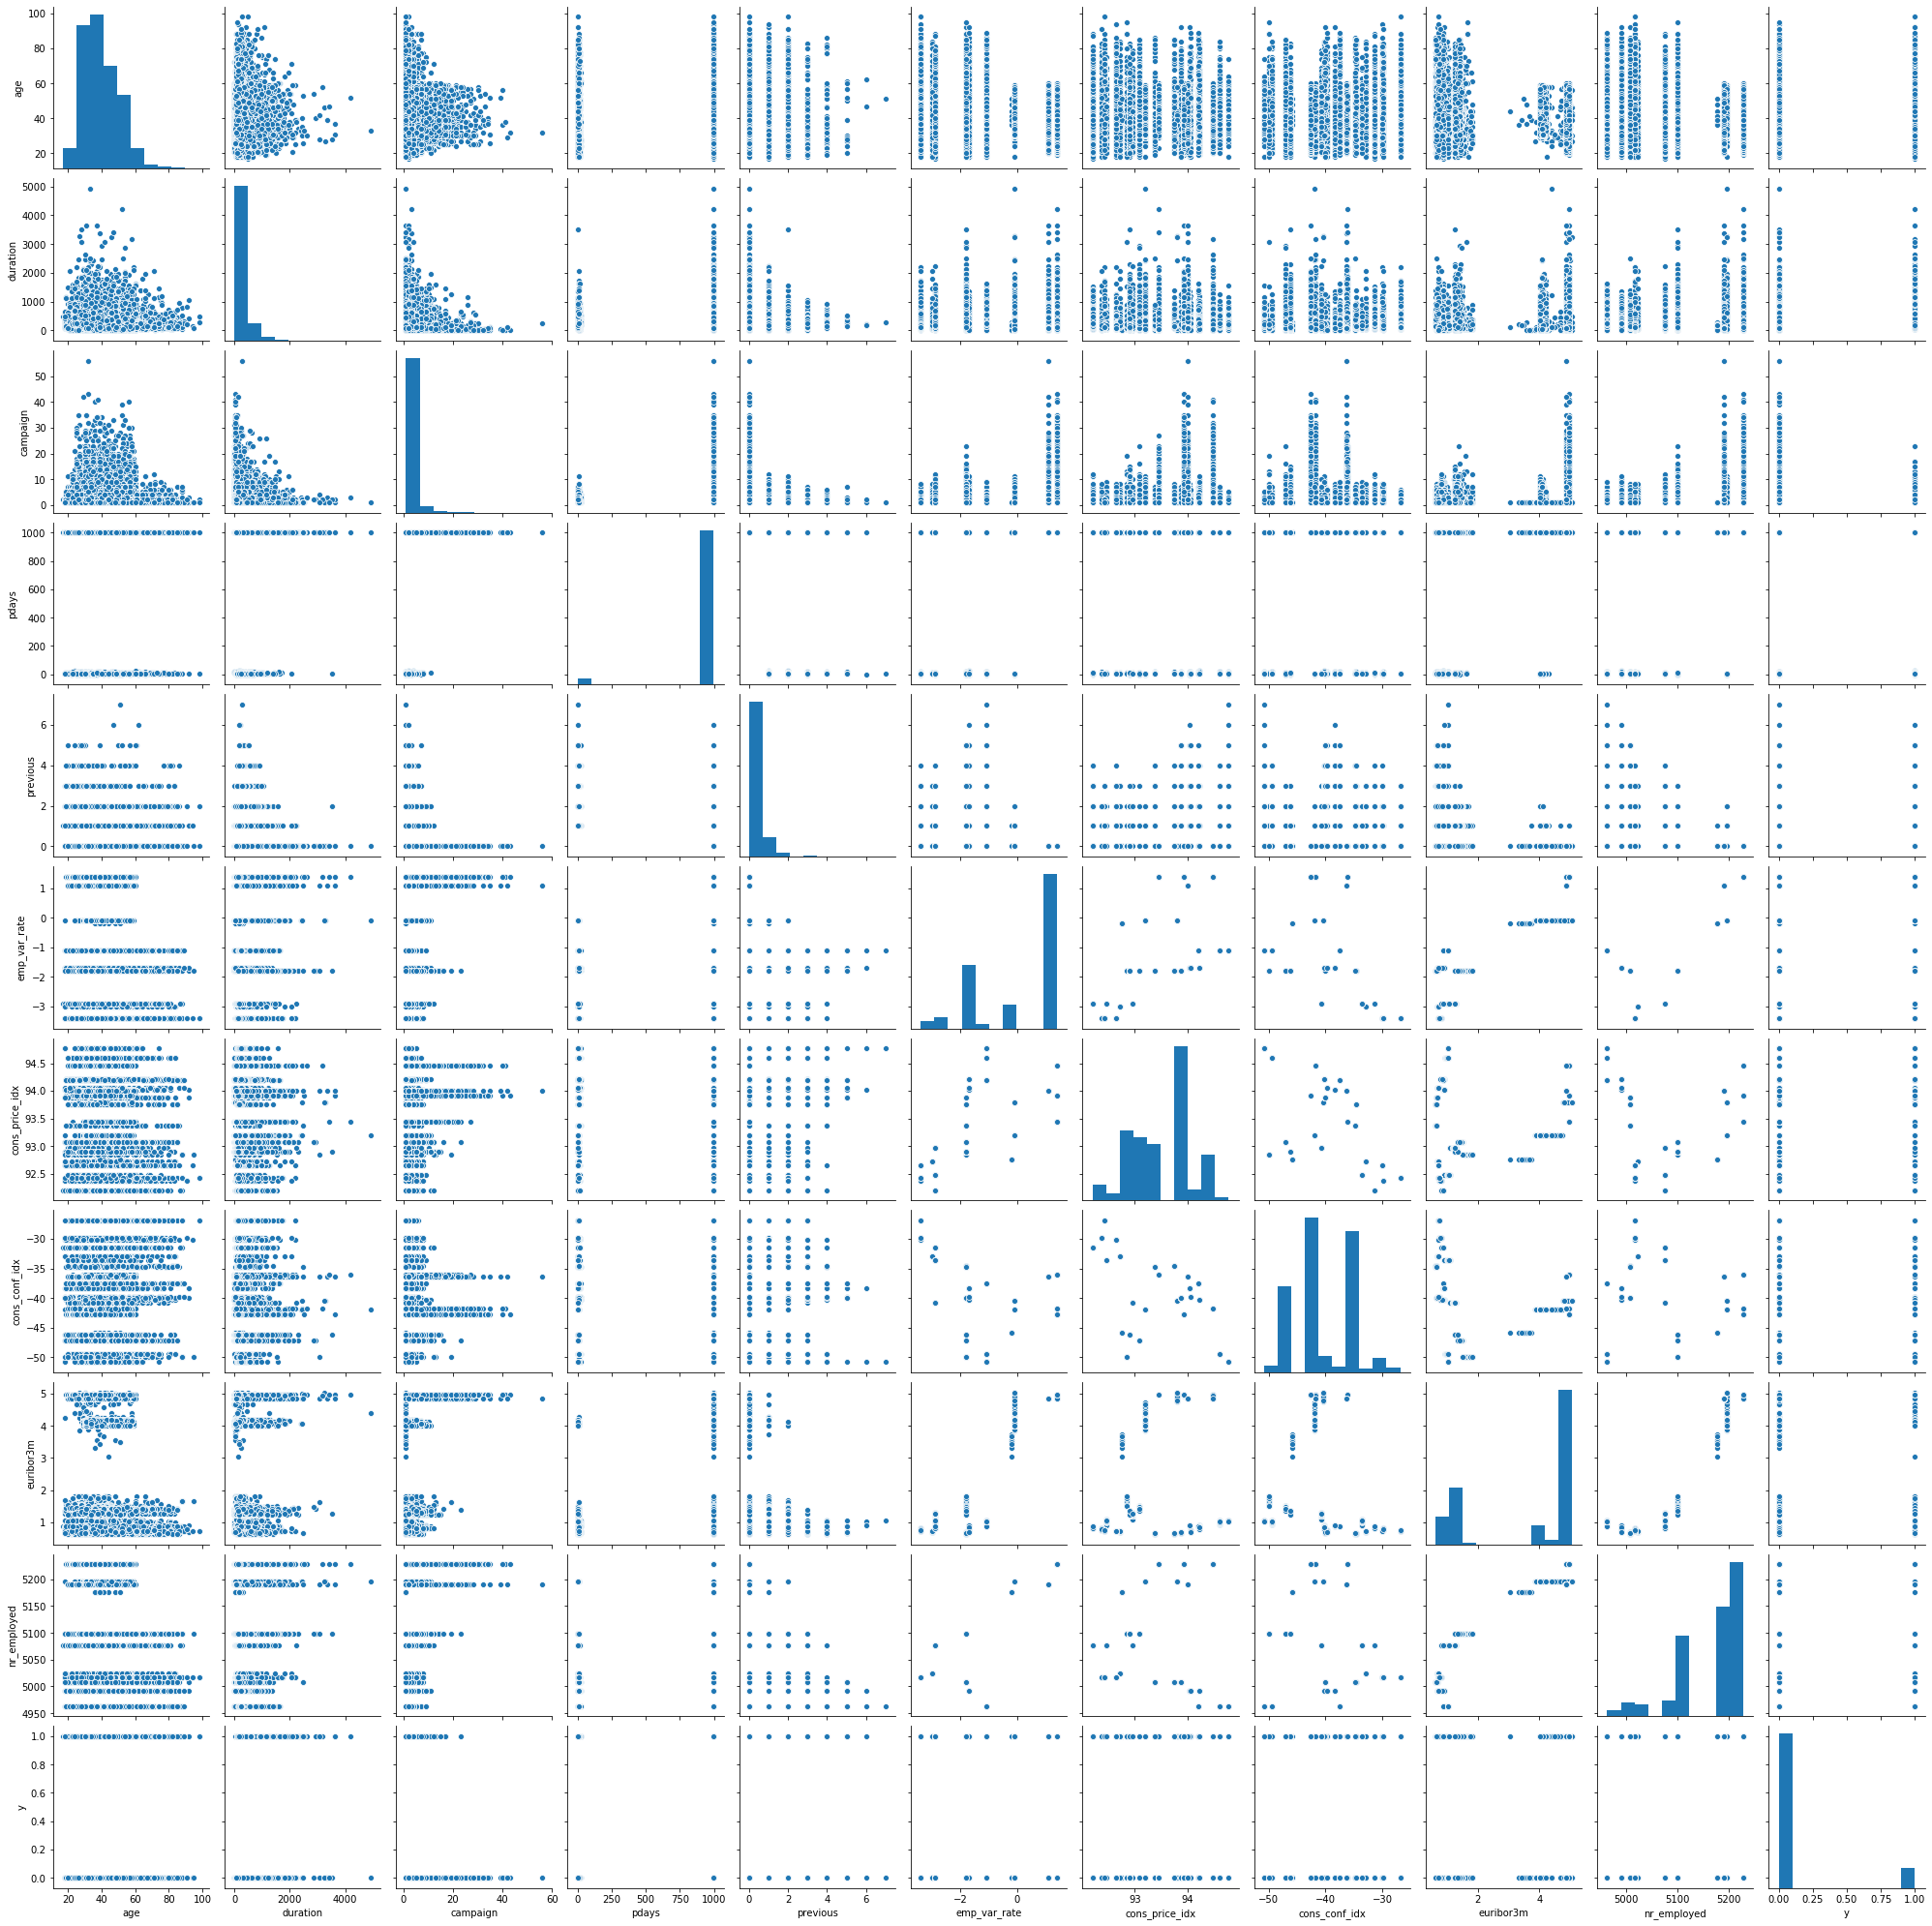

In [6]:
sns.pairplot(td, kind = 'scatter')

In [7]:
td.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0.0,39.936090,220.288382,2.635717,984.656931,0.134007,0.251043,93.605550,-40.570935,3.814199,5176.149729
1.0,40.762545,555.150836,2.033751,793.130824,0.486559,-1.217324,93.368543,-39.860573,2.131457,5095.199701


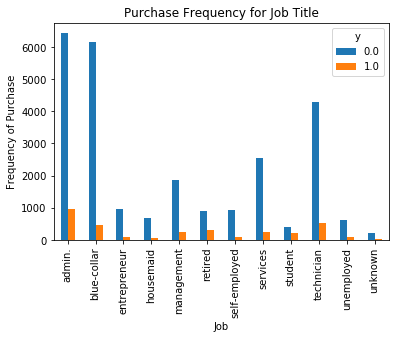

In [8]:
pd.crosstab(td.job,td.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

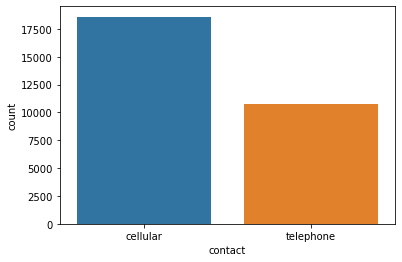

In [9]:
sns.countplot(x = 'contact', data = td)

## DATA CLEANING

In [10]:
#The education column of the dataset has many categories and we need to reduce the categories for a better modelling
td['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [11]:
td['education']=np.where(td['education'] =='basic.9y', 'Basic', td['education'])
td['education']=np.where(td['education'] =='basic.6y', 'Basic', td['education'])
td['education']=np.where(td['education'] =='basic.4y', 'Basic', td['education'])

In [12]:
td['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [13]:
td.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0.0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3.0,6.0,2.0,success,-1.7,94.055,-39.8,0.729,4991.6,1.0
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0.0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,...,1.0,3.0,1.0,success,-2.9,92.201,-31.4,0.869,5076.2,1.0
5,30,management,divorced,Basic,no,yes,no,cellular,jul,tue,...,8.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0.0
6,37,blue-collar,married,Basic,no,yes,no,cellular,may,thu,...,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0.0
7,39,blue-collar,divorced,Basic,no,yes,no,cellular,may,fri,...,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0.0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,...,1.0,3.0,1.0,success,-2.9,92.963,-40.8,1.266,5076.2,1.0
9,27,blue-collar,single,Basic,no,yes,no,cellular,apr,thu,...,2.0,999.0,1.0,failure,-1.8,93.075,-47.1,1.410,5099.1,0.0


In [14]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(td[var], prefix=var)
    data1=td.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=td.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [15]:
td.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0.0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3.0,6.0,2.0,success,-1.7,94.055,-39.8,0.729,4991.6,1.0
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0.0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,...,1.0,3.0,1.0,success,-2.9,92.201,-31.4,0.869,5076.2,1.0
5,30,management,divorced,Basic,no,yes,no,cellular,jul,tue,...,8.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0.0
6,37,blue-collar,married,Basic,no,yes,no,cellular,may,thu,...,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0.0
7,39,blue-collar,divorced,Basic,no,yes,no,cellular,may,fri,...,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0.0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,...,1.0,3.0,1.0,success,-2.9,92.963,-40.8,1.266,5076.2,1.0
9,27,blue-collar,single,Basic,no,yes,no,cellular,apr,thu,...,2.0,999.0,1.0,failure,-1.8,93.075,-47.1,1.410,5099.1,0.0


In [16]:
td.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              1
contact           1
month             1
day_of_week       1
duration          1
campaign          1
pdays             1
previous          1
poutcome          1
emp_var_rate      1
cons_price_idx    1
cons_conf_idx     1
euribor3m         1
nr_employed       1
y                 1
dtype: int64

In [17]:
td.dropna(inplace = True)

In [18]:
mar = pd.get_dummies(td['marital'], drop_first = True)

In [19]:
house = pd.get_dummies(td['housing'], drop_first = True)
pout = pd.get_dummies(td['poutcome'], drop_first = True)

In [20]:
td.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'], dtype=object)

In [22]:
td = pd.concat([td, mar, house, pout], axis = 1)

In [23]:
td.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,euribor3m,nr_employed,y,married,single,unknown,unknown,yes,nonexistent,success
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,4.963,5228.1,0.0,1,0,0,0,1,1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,4.021,5195.8,0.0,1,0,0,0,0,1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,0.729,4991.6,1.0,0,1,0,0,1,0,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,1.405,5099.1,0.0,1,0,0,0,0,1,0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,...,0.869,5076.2,1.0,1,0,0,0,1,0,1
5,30,management,divorced,Basic,no,yes,no,cellular,jul,tue,...,4.961,5228.1,0.0,0,0,0,0,1,1,0
6,37,blue-collar,married,Basic,no,yes,no,cellular,may,thu,...,1.327,5099.1,0.0,1,0,0,0,1,1,0
7,39,blue-collar,divorced,Basic,no,yes,no,cellular,may,fri,...,1.313,5099.1,0.0,0,0,0,0,1,1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,...,1.266,5076.2,1.0,1,0,0,0,0,0,1
9,27,blue-collar,single,Basic,no,yes,no,cellular,apr,thu,...,1.410,5099.1,0.0,0,1,0,0,1,0,0


In [24]:
td.drop(['marital', 'poutcome', 'housing'], inplace = True, axis = 1)

In [25]:
td.head(10)

,age,job,education,default,loan,contact,month,day_of_week,duration,campaign,...,euribor3m,nr_employed,y,married,single,unknown,unknown,yes,nonexistent,success
0,44,blue-collar,Basic,unknown,no,cellular,aug,thu,210.0,1.0,...,4.963,5228.1,0.0,1,0,0,0,1,1,0
1,53,technician,unknown,no,no,cellular,nov,fri,138.0,1.0,...,4.021,5195.8,0.0,1,0,0,0,0,1,0
2,28,management,university.degree,no,no,cellular,jun,thu,339.0,3.0,...,0.729,4991.6,1.0,0,1,0,0,1,0,1
3,39,services,high.school,no,no,cellular,apr,fri,185.0,2.0,...,1.405,5099.1,0.0,1,0,0,0,0,1,0
4,55,retired,Basic,no,no,cellular,aug,fri,137.0,1.0,...,0.869,5076.2,1.0,1,0,0,0,1,0,1
5,30,management,Basic,no,no,cellular,jul,tue,68.0,8.0,...,4.961,5228.1,0.0,0,0,0,0,1,1,0
6,37,blue-collar,Basic,no,no,cellular,may,thu,204.0,1.0,...,1.327,5099.1,0.0,1,0,0,0,1,1,0
7,39,blue-collar,Basic,no,no,cellular,may,fri,191.0,1.0,...,1.313,5099.1,0.0,0,0,0,0,1,1,0
8,36,admin.,university.degree,no,no,cellular,jun,mon,174.0,1.0,...,1.266,5076.2,1.0,1,0,0,0,0,0,1
9,27,blue-collar,Basic,no,no,cellular,apr,thu,191.0,2.0,...,1.410,5099.1,0.0,0,1,0,0,1,0,0


In [26]:
cn = pd.get_dummies(td['contact'],drop_first = True)

In [27]:
td = pd.concat([td, cn], axis = 1)

In [28]:
td.drop(['job', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'unknown'], inplace = True, axis = 1)

In [29]:
td.head(10)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,married,single,yes,nonexistent,success,telephone
0,44,210.0,1.0,999.0,0.0,1.4,93.444,-36.1,4.963,5228.1,0.0,1,0,1,1,0,0
1,53,138.0,1.0,999.0,0.0,-0.1,93.200,-42.0,4.021,5195.8,0.0,1,0,0,1,0,0
2,28,339.0,3.0,6.0,2.0,-1.7,94.055,-39.8,0.729,4991.6,1.0,0,1,1,0,1,0
3,39,185.0,2.0,999.0,0.0,-1.8,93.075,-47.1,1.405,5099.1,0.0,1,0,0,1,0,0
4,55,137.0,1.0,3.0,1.0,-2.9,92.201,-31.4,0.869,5076.2,1.0,1,0,1,0,1,0
5,30,68.0,8.0,999.0,0.0,1.4,93.918,-42.7,4.961,5228.1,0.0,0,0,1,1,0,0
6,37,204.0,1.0,999.0,0.0,-1.8,92.893,-46.2,1.327,5099.1,0.0,1,0,1,1,0,0
7,39,191.0,1.0,999.0,0.0,-1.8,92.893,-46.2,1.313,5099.1,0.0,0,0,1,1,0,0
8,36,174.0,1.0,3.0,1.0,-2.9,92.963,-40.8,1.266,5076.2,1.0,1,0,0,0,1,0
9,27,191.0,2.0,999.0,1.0,-1.8,93.075,-47.1,1.410,5099.1,0.0,0,1,1,0,0,0


In [30]:
# Removes Duplicate columns 
td = td.loc[:,~td.columns.duplicated()]
td.head(10)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,married,single,yes,nonexistent,success,telephone
0,44,210.0,1.0,999.0,0.0,1.4,93.444,-36.1,4.963,5228.1,0.0,1,0,1,1,0,0
1,53,138.0,1.0,999.0,0.0,-0.1,93.200,-42.0,4.021,5195.8,0.0,1,0,0,1,0,0
2,28,339.0,3.0,6.0,2.0,-1.7,94.055,-39.8,0.729,4991.6,1.0,0,1,1,0,1,0
3,39,185.0,2.0,999.0,0.0,-1.8,93.075,-47.1,1.405,5099.1,0.0,1,0,0,1,0,0
4,55,137.0,1.0,3.0,1.0,-2.9,92.201,-31.4,0.869,5076.2,1.0,1,0,1,0,1,0
5,30,68.0,8.0,999.0,0.0,1.4,93.918,-42.7,4.961,5228.1,0.0,0,0,1,1,0,0
6,37,204.0,1.0,999.0,0.0,-1.8,92.893,-46.2,1.327,5099.1,0.0,1,0,1,1,0,0
7,39,191.0,1.0,999.0,0.0,-1.8,92.893,-46.2,1.313,5099.1,0.0,0,0,1,1,0,0
8,36,174.0,1.0,3.0,1.0,-2.9,92.963,-40.8,1.266,5076.2,1.0,1,0,0,0,1,0
9,27,191.0,2.0,999.0,1.0,-1.8,93.075,-47.1,1.410,5099.1,0.0,0,1,1,0,0,0


## MODEL BUILDING

In [31]:
X = td.drop('y', axis = 1)
y = td['y']

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [33]:
# 80% data will be used for model training and 20% for model testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0 )

In [34]:
# scaling data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
# building model 
model = LogisticRegression(solver = 'liblinear', random_state = 0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [36]:
predict = model.predict(X_test)

In [37]:
# confusion_matrix

cnf = confusion_matrix(y_test, predict)

# Here, you can see the confusion matrix in the form of the array object.
# The dimension of this matrix is 2*2 because this model is binary classification.
# You have two classes 0 and 1.
# Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions.

Text(0.5, 257.44, 'Predicted label')

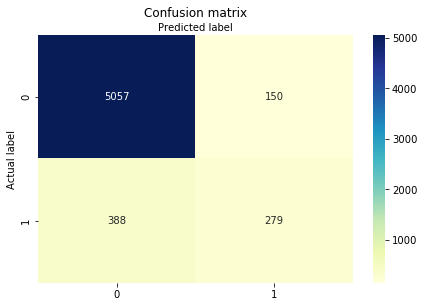

In [38]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [39]:
# Classification report
classification_report(y_test, predict)

'              precision    recall  f1-score   support\n\n         0.0       0.93      0.97      0.95      5207\n         1.0       0.65      0.42      0.51       667\n\n    accuracy                           0.91      5874\n   macro avg       0.79      0.69      0.73      5874\nweighted avg       0.90      0.91      0.90      5874\n'

In [40]:
accuracy_score(y_test, predict)

0.9084099421178072

In [41]:
# accuracy score
print("ACCURACY OF OUR MODEL IS : " + str(accuracy_score(y_test, predict)* 100) + "%")

ACCURACY OF OUR MODEL IS : 90.84099421178072%


### Managed to train our model with an 90.84 % accuracy!